In [370]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
import scipy.stats as ss
%matplotlib inline

# Problem Statement
--------

This data corresponds to a straight line with noise added. Estimate the slope and intercept values. Plot the resulting line in a different colour over the noisy data to check the quality of the fit. Will you use lstsq or curve_fit for this?

----

# Dataset1

Initially, we loaded the dataset.

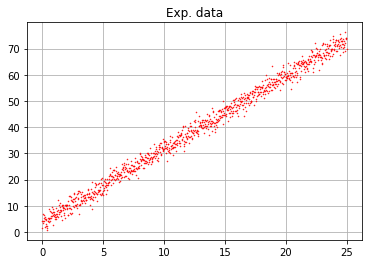

In [507]:
dataset= np.loadtxt("dataset1.txt")
t=[]
y=[]
for element in dataset:
    t.append(element[0])
    y.append(element[1])
t= np.array(t)
y= np.array(y)

plt.plot(t,y,'r.', markersize=1)
plt.grid()
plt.title("Exp. data")
plt.show()

It is evident that this is a straight line.

We will now create a function that generates a straight line.

In [373]:
def straightline(t, m, c):
    return m*t+ c

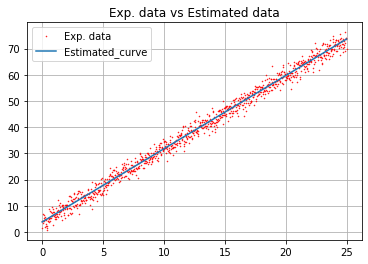

In [439]:
M= np.column_stack([t, np.ones(len(t))])
(m,c),_,_,_= np.linalg.lstsq(M, y, rcond= None) #function for minimizing the least square 
Ylsqm= straightline(t,m,c)

plt.plot(t,y,'r.',markersize=1)
plt.plot(t,Ylsqm)
plt.legend(["Exp. data", "Estimated_curve"], loc="upper left")
plt.title("Exp. data vs Estimated data")
plt.grid()
plt.show()

My next step is to make an error function.

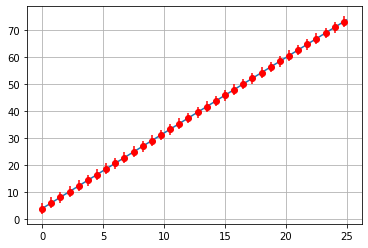

In [440]:
plt.errorbar(t[::30],Ylsqm[::30],np.std(Ylsqm - y) ,fmt="ro")
plt.plot(t,Ylsqm)
plt.grid()
plt.show()

## Using curve fit

In [376]:
(m2, c2), _= curve_fit(straightline, t, y)
print(f"Estimated: {m2} and {c2}")
ycurvefit= straightline(t, m2,c2)

Estimated: 2.7911242448201588 and 3.848800111263445


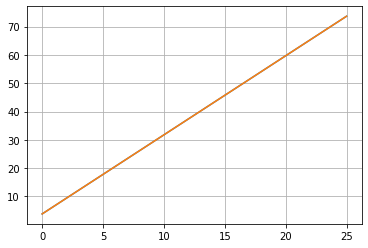

In [442]:
plt.plot(t,Ylsqm, t,ycurvefit)
plt.grid()
plt.show()

We will now create a function to calculate the error.

In [378]:
def errorfunction(f1,f2):
    return sum(((f1-f2)**2)/len(f1))

In [379]:
Error_curvefit= errorfunction(y,ycurvefit)
Error_lsqm= errorfunction(y,Ylsqm)
print(f"Error for Curvefit method is: {Error_curvefit} \n Error for Least Square method is: {Error_lsqm}")

Error for Curvefit method is: 3.9834123805732755 
 Error for Least Square method is: 3.983412380573278


# Problem 2

----
This data corresponds to a sum of several sine waves that are harmonics of some fundamental frequency. You can either use curve_fit to estimate the frequency, or estimate it by examining the data carefully and making your own guesses. After that you need to estimate how many sine waves and what the coefficients are. Explain how you obtained the frequency and the amplitudes, whether linear or non-linear fitting is better, and any other relevant information.

--------

# Dataset 2

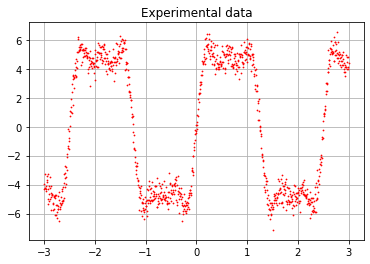

In [450]:
dataset2= np.loadtxt("dataset2.txt")
datset2_X= []
datset2_Y= []
for element in dataset2:
    datset2_X.append(element[0])
    datset2_Y.append(element[1])
dtset2_X= np.array(datset2_X)
dtset2_Y= np.array(datset2_Y)

plt.plot(datset2_X,datset2_Y,'r.',markersize=1.5)
plt.title("Experimental data")
plt.grid()
plt.show()


## Objective
My objective is to perform Fast Fourier Transform on the given plot and identify the frequency with the highest output. To obtain more accurate frequencies, I plan to filter the FFT by nullifying magnitudes less than 250

In [382]:
yn = np.fft.rfft(datset2_Y)

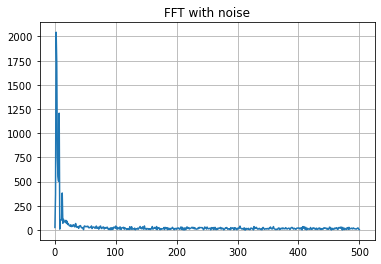

In [383]:
plt.plot(abs(yn))
plt.title("FFT with noise")
plt.grid()
plt.show()

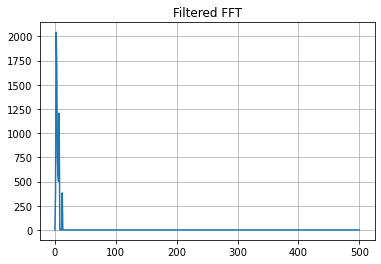

In [384]:
for i in range(len(yn)):
    if abs(yn[i])<250:
        yn[i]=0
plt.plot(abs(yn))
plt.title("Filtered FFT")
plt.grid()
plt.show()

Then moving on to print the angular frequencies for which I got the peaks.

In [456]:
peaks= find_peaks(abs(yn))

print(f"The Required Frequencies are: {[x for x in peaks[0]]}")

The Required Frequencies are: [2, 7, 12]


After identifying the frequency with the highest output through FFT and filtering, my next step was to develop a parametrized Fourier function using sine functions with the identified frequencies. I then used curve fitting to estimate the curve.

In [386]:
def fourier(t, a0,a1,c1,a2,c2,a3,c3,p1,p2,p3):
    return a0/2+ a1*np.sin(2*p1*t+ c1)+ a2*np.sin(7*p2*t+c2)+ a3*np.sin(12*p3*t+c3)

In [387]:
[a0,a1,c1,a2,c2,a3,c3,p1,p2,p3],_= curve_fit(fourier, datset2_X,datset2_Y)

datset2_Y_sol=[]
for i in range(len(datset2_X)):
    datset2_Y_sol.append(fourier(datset2_X[i], a0,a1,c1,a2,c2,a3,c3,p1,p2,p3))

datset2_Y_sol= np.array(datset2_Y_sol)


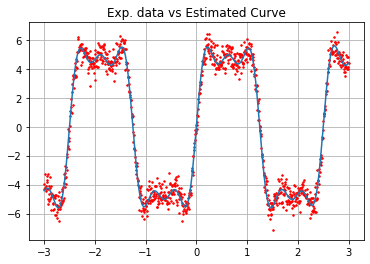

In [389]:
plt.plot(datset2_X,datset2_Y,'r.',markersize=3)
plt.plot(datset2_X,datset2_Y_sol)
plt.title("Exp. data vs Estimated Curve")
plt.grid()
plt.show()


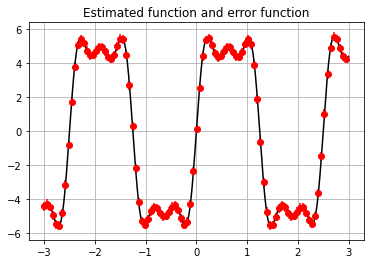

In [390]:
plt.errorbar(datset2_X[::10], datset2_Y_sol[::10],np.mean((datset2_Y-datset2_Y_sol)**2),fmt='ro')
plt.plot(datset2_X,datset2_Y_sol,'black')
plt.title("Estimated function and error function")
plt.grid()
plt.show()

# Problem Statement
-------------
The data here corresponds to an observation of Blackbody radiation and follows Planck's law (look it up if you have forgotten the equation). You are told that Boltzmann's constant is 1.38e-23 and the speed of light is 3.0e8 (we assume you know the units). Estimate the temperature at which the observations were taken, and estimate Planck's constant from the data given. Briefly explain your approach.

------------

# Dataset 3

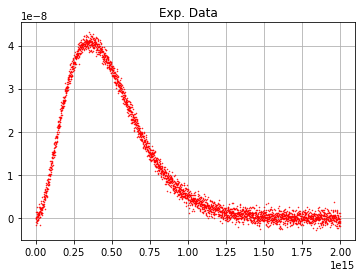

In [449]:
dataset3= np.loadtxt("dataset3.txt")
datset3_X= []
datset3_Y= []
for element in dataset3:
    datset3_X.append(element[0])
    datset3_Y.append(element[1])
datset3_X= np.array(datset3_X)
datset3_Y= np.array(datset3_Y)

plt.plot(datset3_X,datset3_Y,'r.',markersize=1)
plt.title("Exp. Data")
plt.grid()
plt.show()

In [394]:
#describing some constants
c= 3.0e8
k= 1.38e-23
exp= 2.71828182845904

I began by searching for the Blackbody Radiation Formulae on Google:
$$B_{v}(v,T) = \cfrac{2hv^{3}}{c^{2}} \cfrac{1}{e^{\frac{h\nu}{kT}}-1}$$

[Reference](https://en.wikipedia.org/wiki/Black-body_radiation#Equations)

## Procedure
To achieve my ultimate goal of accurately modeling the Blackbody Radiation in the data, my next steps will involve developing a parametrized function that can effectively capture the underlying pattern of the data. This will be an iterative process that will involve a careful exploration of the data and a systematic effort to identify the key parameters that drive the observed patterns.

Once I have identified these key parameters, I will use them to generate a parametrized function that can be used to estimate the overall shape of the data. I will then use the curve_fit method to fit a curve to the data, which will allow me to generate an estimated curve that captures the overall pattern of the distribution.

By performing these steps, I hope to develop a more robust and accurate model of the Blackbody Radiation in the data. This model will serve as a valuable tool in subsequent analysis and modeling efforts, helping me to better understand the underlying physics and mechanisms that are driving the observed patterns in the data.

In [395]:
def BlackBodyRadiation(data, H,T):
    numerator= (2*H*(data**3)/(c**(2)))
    const2=(np.exp(H*data/(k*T))-1)
    return numerator/const2

In [396]:
[H,T],_ =curve_fit(BlackBodyRadiation,datset3_X,datset3_Y,p0= [6.6e-34,2000])
datset3_Y_sol=BlackBodyRadiation(datset3_X,H,T)


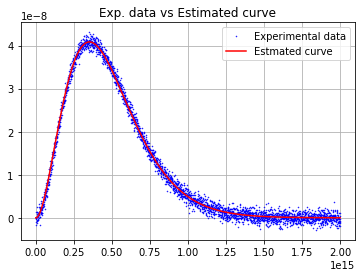

In [397]:
plt.plot(datset3_X,datset3_Y, 'b.',markersize=1)
plt.plot(datset3_X, datset3_Y_sol,'red')
plt.legend(['Experimental data','Estmated curve'])
plt.title("Exp. data vs Estimated curve")
plt.grid()
plt.show()

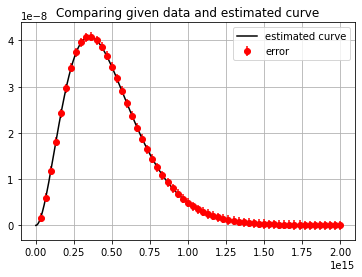

Value of Temperature= 6011.361539304806 
Value of Plank's constant= 6.643229785946868e-34


In [398]:
plt.errorbar(x=datset3_X[::50], y=datset3_Y_sol[::50] ,yerr= np.std(datset3_Y-datset3_Y_sol),fmt="ro")
plt.plot(datset3_X,datset3_Y_sol,'black')
plt.title("Comparing given data and estimated curve")
plt.legend(['estimated curve','error'])
plt.grid()
plt.show()
print(f"Value of Temperature= {T} \nValue of Plank's constant= {H}")

## Observation
During our observation, we noted that the temperature of the system was 6011.36 K and the value of Planck's constant was 6.64e-34.

# Problem Statement

---------------
This is a dataset where there are multiple measurements for each point on the x-axis. The nature of the data is unknown - even the TAs have not been informed of how the data was generated. You need to decide on what is the best fit, extract suitable fit parameters, and justify your choices.

-----------

# Datasheet 4

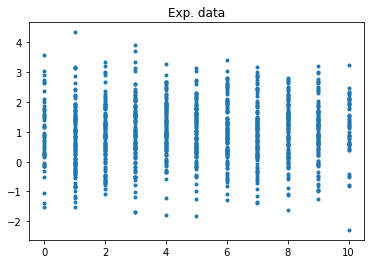

In [399]:
dataset4= np.loadtxt("dataset4.txt")
datset4_X= []
datset4_Y= []
for element in dataset4:
    datset4_X.append(element[0])
    datset4_Y.append(element[1])
dtset4_X= np.array(datset4_X)
dtset4_Y= np.array(datset4_Y)

plt.plot(datset4_X,datset4_Y,".")
plt.title("Exp. data")
plt.show()

### Procedure
To gain a better understanding of the data, my next step will be to compile all the available data by appending it along the y-axis. I will then further sort this data and plot it using Matplotlib to visualize its distribution and characteristics. By performing these steps, I hope to gain insights into the underlying patterns and trends in the data that can help inform subsequent analysis and modeling efforts.

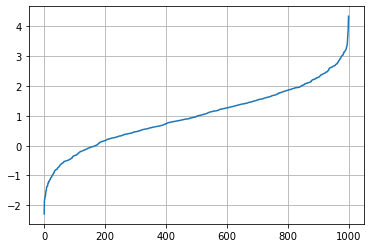

In [484]:
datset4_Yn=[[],[],[],[],[],[],[],[],[],[],[]]
for i in range(len(datset4_X)):
    datset4_Yn[int(datset4_X[i])].append(datset4_Y[i])
    
for i in range(len(datset4_Yn)):
    datset4_Yn[i]= np.array(datset4_Yn[i])

data_y4= np.array([])

for data in datset4_Yn:
    data_y4= np.append(data_y4,data)

len(data_y4)
data_y4= np.sort(data_y4)

x_axis=[]
for i in range(1000):
    x_axis.append(i)
x_axis= np.array(x_axis)
plt.plot(x_axis, data_y4)
plt.grid()
plt.show()


### Observation
It is apparent that the given distribution is a sorted random distribution following a Gaussian pattern

I proceeded to visualize the distribution by generating a histogram.

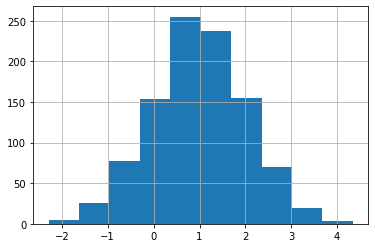

In [481]:
plt.hist(data_y4)
plt.grid()
plt.show()


## Further Goal
Since the distribution is a Gaussian normal distribution, I plan to use this information to my advantage in my subsequent analysis. Specifically, my next steps will involve first plotting the probability distribution function of the dataset. This will allow me to visualize the underlying probability density of the distribution and gain insights into its shape and characteristics.

To generate this probability distribution function, I plan to parametrize a standard PDF function that is appropriate for a Gaussian normal distribution. Once I have defined this function, I will use the curve_fit method to fit a curve to the data and generate an estimated curve that captures the overall pattern of the distribution.

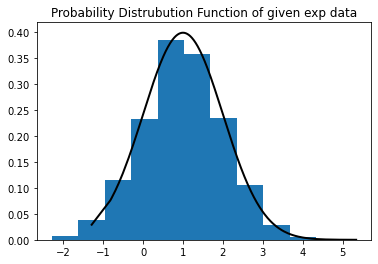

In [485]:
data_y4_pdf = ss.norm.pdf(data_y4)
data_y4n= data_y4+1
plt.hist(data_y4, density=True)
plt.plot(data_y4n, data_y4_pdf, 'k',linewidth= 2)
plt.title("Probability Distrubution Function of given exp data")

plt.show()

In statistics, a normal distribution or Gaussian distribution is a type of continuous probability distribution for a real-valued random variable. The general form of its probability density function is:
$$f(x)= \cfrac{1}{\sigma \sqrt{2\pi}} e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^{2}}$$
[Source Link](https://en.wikipedia.org/wiki/Normal_distribution)

In [486]:
def Gaussian_distribution(t, mu, sigma):
    const= 1/(sigma*((2*np.pi)**(0.5)))
    power= -1*0.5*(((t- mu)/sigma)**2) 
    return const*np.exp(power)

In [487]:
[mu,sigma],_= curve_fit(Gaussian_distribution, data_y4n,data_y4_pdf)

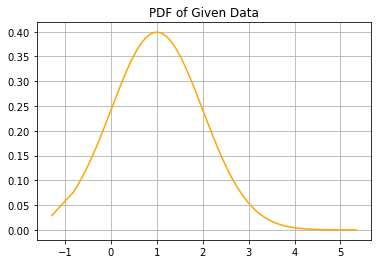

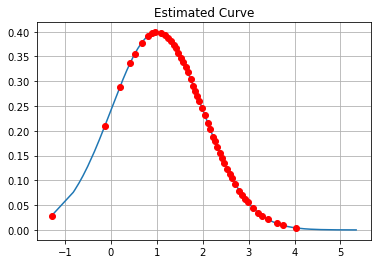

In [493]:
estimated_curve= Gaussian_distribution(data_y4n,mu,sigma)

plt.plot(data_y4n,data_y4_pdf,'orange')
plt.title("PDF of Given Data")
plt.grid()
plt.show()

plt.plot(data_y4n, estimated_curve)
plt.errorbar(data_y4n[::20],data_y4_pdf[::20],np.std(estimated_curve-data_y4_pdf),fmt='ro')
plt.title("Estimated Curve")
plt.grid()


plt.show()

In [491]:
Gaussian_distribution(1,mu,sigma)

0.3989422804014327